In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("Non_linear_SVM_Dataset.csv")
df

,X1,X2,Y
0,0.830858,-0.334342,1.0
1,0.991710,0.879000,0.0
2,1.107245,-0.470344,1.0
3,-0.140899,1.033148,0.0
4,0.405592,1.328529,0.0
...,...,...,...
495,0.265123,1.023197,0.0
496,0.193576,-0.011663,1.0
497,0.345548,-0.128434,1.0
498,1.403890,-0.466993,1.0


In [2]:
Y = df["Y"]
X = df.iloc[:,0:2]
X.head()

,X1,X2
0,0.830858,-0.334342
1,0.991710,0.879000
2,1.107245,-0.470344
3,-0.140899,1.033148
4,0.405592,1.328529


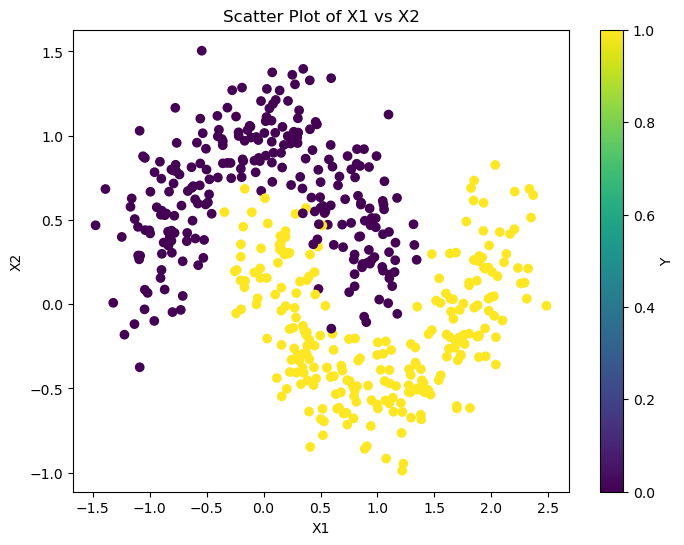

In [3]:
# prompt: construct a scatter plot in between X1 and X2 and Y variable with 2D visualization

import matplotlib.pyplot as plt

# Assuming X1 and X2 are the first two columns of X
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap='viridis')  # Use Y for color mapping
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter Plot of X1 vs X2")
plt.colorbar(label="Y") # Show colorbar to represent values in Y
plt.show()


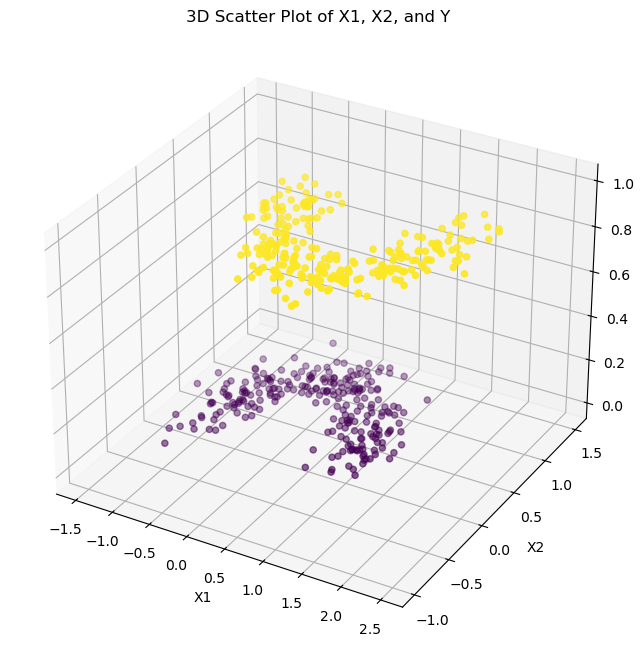

In [4]:
# prompt: construct a scatter plot in between X1 and X2 and Y variable with 3 D visualization

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['X1'], X['X2'], Y, c=Y, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot of X1, X2, and Y')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test    = train_test_split(X, Y, test_size=0.3)

In [6]:
# Linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


Training score: 0.87
Test score: 0.84


D:\softwares\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


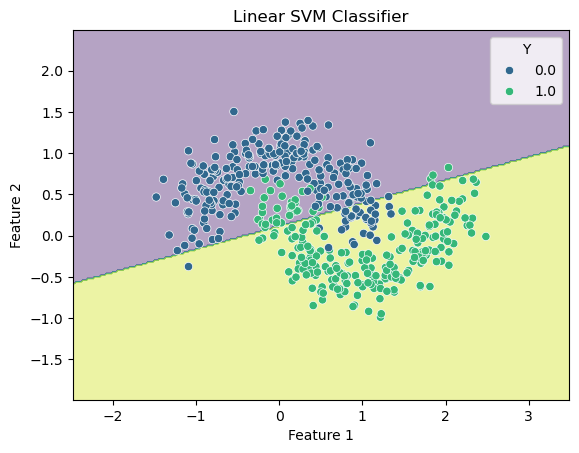

In [7]:
# prompt: visualize the data for the above linear classifer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming X and Y are defined as in your previous code.
# X_train, X_test, Y_train, Y_test, model are also assumed to be defined.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classifier")
plt.show()


In [16]:
# Polynomial classifier
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=3)   # degree = 2,3,4
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


Training score: 0.9
Test score: 0.88


D:\softwares\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


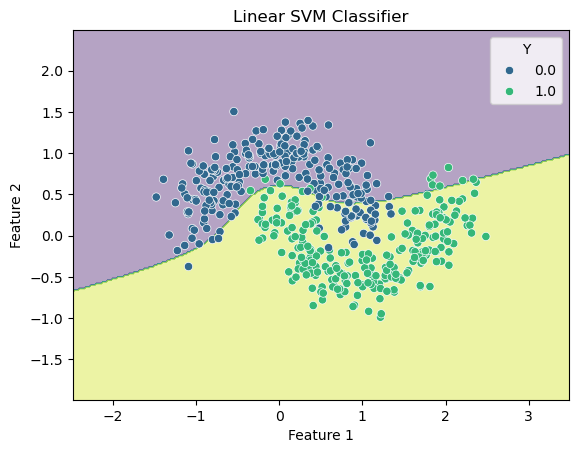

In [17]:
# prompt: visualize the data for the above linear classifer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming X and Y are defined as in your previous code.
# X_train, X_test, Y_train, Y_test, model are also assumed to be defined.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classifier")
plt.show()


In [18]:
# Radial basis classifier
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))


Training score: 0.98
Test score: 0.96


D:\softwares\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


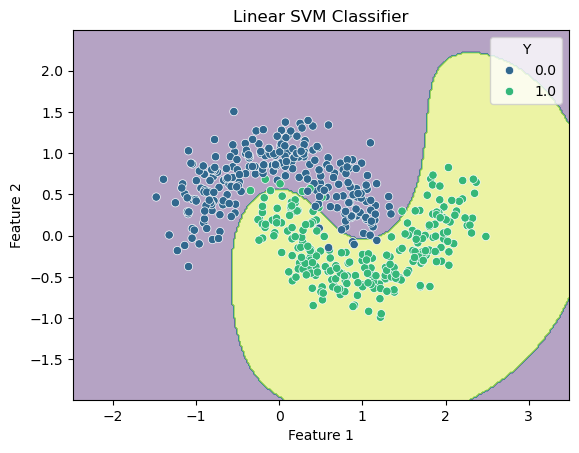

In [19]:
# prompt: visualize the data for the above linear classifer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming X and Y are defined as in your previous code.
# X_train, X_test, Y_train, Y_test, model are also assumed to be defined.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=Y, palette="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classifier")
plt.show()


In [ ]:
# prompt: show me the rbf graph in 3D

# Assuming X, Y, and model are defined as in your previous code.

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Increased step for smoother plot
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface
ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.5)


# Plot the data points
ax.scatter(X['X1'], X['X2'], Y, c=Y, cmap='viridis', edgecolor='k') # Added edgecolor for better visibility


ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted Y')
ax.set_title('3D Visualization of RBF SVM Decision Boundary')

plt.show()
